In [32]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import plotly.express as px 
from scipy.fftpack import fft 
from sklearn.model_selection import train_test_split
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA


# Dynamic Pressure

In [33]:
Normal_DP=pd.read_csv("Normal_DP.csv")

In [34]:
Normal_DP=Normal_DP.drop(columns=['Unnamed: 0'])
Normal_DP

,Time,P out bar,P in bar,Q L/M,Dynamic Pressure,H
0,0.000000,1.161289,-0.084085,49.443383,-0.002651,1.245374
1,0.000098,1.161289,-0.084085,49.443383,-0.004067,1.245374
2,0.000195,1.161289,-0.084085,49.443383,-0.003631,1.245374
3,0.000293,1.161289,-0.084085,49.443383,-0.010969,1.245374
4,0.000391,1.161289,-0.084085,49.443383,-0.002324,1.245374
...,...,...,...,...,...,...
919995,89.843262,0.593152,-0.090887,49.371344,0.018307,0.684039
919996,89.843359,0.593152,-0.090887,49.371344,0.026480,0.684039
919997,89.843457,0.593152,-0.090887,49.371344,0.018162,0.684039
919998,89.843555,0.593152,-0.090887,49.371344,0.021976,0.684039


In [35]:
Normal_DPx=Normal_DP
Normal_DP=Normal_DPx.drop(columns=['Time '])
Normal_DP

,P out bar,P in bar,Q L/M,Dynamic Pressure,H
0,1.161289,-0.084085,49.443383,-0.002651,1.245374
1,1.161289,-0.084085,49.443383,-0.004067,1.245374
2,1.161289,-0.084085,49.443383,-0.003631,1.245374
3,1.161289,-0.084085,49.443383,-0.010969,1.245374
4,1.161289,-0.084085,49.443383,-0.002324,1.245374
...,...,...,...,...,...
919995,0.593152,-0.090887,49.371344,0.018307,0.684039
919996,0.593152,-0.090887,49.371344,0.026480,0.684039
919997,0.593152,-0.090887,49.371344,0.018162,0.684039
919998,0.593152,-0.090887,49.371344,0.021976,0.684039


In [36]:
#Normalizing the data
for col in Normal_DP:
    Normal_DP[col] = (Normal_DP[col]-Normal_DP[col].min())/(Normal_DP[col].max()-Normal_DP[col].min())

In [37]:
Cavitation_DP=pd.read_csv("Cavitation_DP.csv")
Cavitation_DP=Cavitation_DP.drop(columns=['Unnamed: 0'])
Cavitation_DP

,Time,P out bar,P in bar,Q L/M,Dynamic Pressure,H
0,0.000000,0.165204,-0.616328,27.839285,0.024410,0.781532
1,0.000098,0.371800,-0.616328,27.839285,0.018997,0.988128
2,0.000195,0.371800,-0.616328,27.839285,0.016745,0.988128
3,0.000293,0.371800,-0.616328,27.839285,0.022920,0.988128
4,0.000391,0.371800,-0.616328,27.839285,0.010825,0.988128
...,...,...,...,...,...,...
1048571,102.399512,0.215623,-0.624159,27.789128,0.019324,0.839782
1048572,102.399609,0.215623,-0.624159,27.789128,0.009372,0.839782
1048573,102.399707,0.215623,-0.624159,27.789128,0.013077,0.839782
1048574,102.399805,0.215623,-0.624159,27.789128,0.018344,0.839782


In [38]:
Cavitation_DPx=Cavitation_DP
Cavitation_DP=Cavitation_DP.drop(columns=['Time '])
Cavitation_DP

,P out bar,P in bar,Q L/M,Dynamic Pressure,H
0,0.165204,-0.616328,27.839285,0.024410,0.781532
1,0.371800,-0.616328,27.839285,0.018997,0.988128
2,0.371800,-0.616328,27.839285,0.016745,0.988128
3,0.371800,-0.616328,27.839285,0.022920,0.988128
4,0.371800,-0.616328,27.839285,0.010825,0.988128
...,...,...,...,...,...
1048571,0.215623,-0.624159,27.789128,0.019324,0.839782
1048572,0.215623,-0.624159,27.789128,0.009372,0.839782
1048573,0.215623,-0.624159,27.789128,0.013077,0.839782
1048574,0.215623,-0.624159,27.789128,0.018344,0.839782


In [39]:
#Normalizing the data
for col in Cavitation_DP:
    Cavitation_DP[col] = (Cavitation_DP[col]-Cavitation_DP[col].min())/(Cavitation_DP[col].max()-Cavitation_DP[col].min())

In [40]:
scaler = StandardScaler()

scaler.fit(Normal_DP)
Normal_DP = scaler.transform(Normal_DP)

scaler.fit(Cavitation_DP)
Cavitation_DP = scaler.transform(Cavitation_DP)


In [41]:
df=Normal_DP
Cavdf=Cavitation_DP


In [42]:
df = pd.DataFrame(df, columns =[ 'P out bar', 'P in bar', 'Q  L/M', 'Dynamic Pressure','H'])
Cavdf = pd.DataFrame(Cavdf, columns =['P out bar', 'P in bar', 'Q  L/M', 'Dynamic Pressure','H'])


In [43]:
X_train, X_test=train_test_split(df, test_size=0.3, random_state=1)


In [44]:
oneclass_SVM = OneClassSVM(kernel='rbf', gamma=0.1, nu=0.01)
oneclass_SVM.fit(X_train)

OneClassSVM(gamma=0.1, nu=0.01)

In [45]:
prediction= oneclass_SVM.predict(X_test)
score =0
for f in range (0,X_test.shape[0]):
    if(prediction[f]==1):
        score=score+1

accuracy = score / X_test.shape[0]
print("Percentage of normal: {:.2%}".format(accuracy))


Accuracy: 98.98%


In [46]:
prediction= oneclass_SVM.predict(Cavdf)
score =0
for f in range (0,X_test.shape[0]):
    if(prediction[f]==1):
        score=score+1

accuracy = score / X_test.shape[0]
print("Percentage of normal: {:.2%}".format(accuracy))


Accuracy: 92.67%


In [47]:
df_test = Cavdf

In [48]:
prediction = [1 if i==-1 else 0 for i in prediction]
df_test['y_test'] = score
df_test['prediction'] = prediction

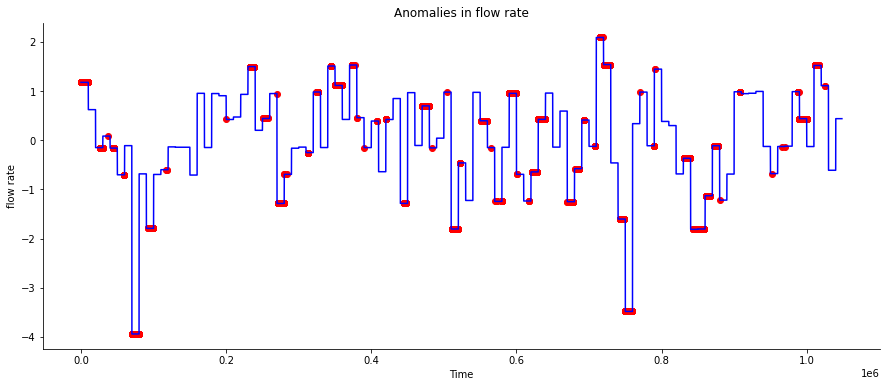

In [49]:
fig, ax = plt.subplots(figsize=(15,6))

a = df_test.loc[df_test['prediction'] == 1, ['Q  L/M']] #anomaly

ax.plot(df_test.index, df_test['Q  L/M'], color='blue')
ax.scatter(a.index, a['Q  L/M'], color='red')
sb.despine()
plt.title("Anomalies in flow rate")
plt.xlabel("Time")
plt.ylabel("flow rate")
plt.show()

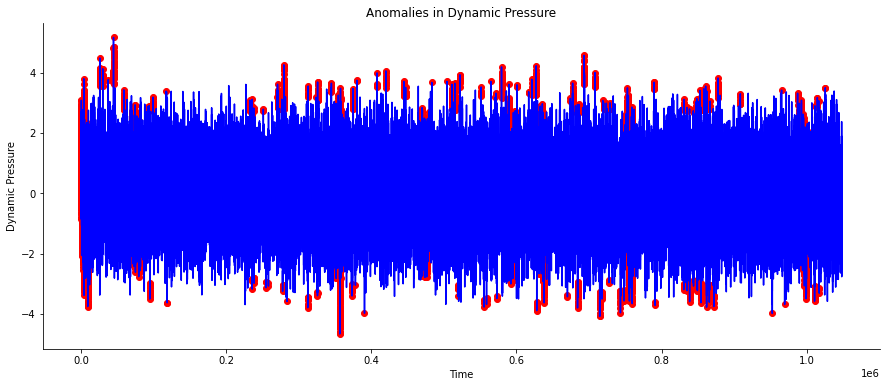

In [50]:
fig, ax = plt.subplots(figsize=(15,6))

a = df_test.loc[df_test['prediction'] == 1, ['Dynamic Pressure']] #anomaly

ax.plot(df_test.index, df_test['Dynamic Pressure'], color='blue')
ax.scatter(a.index, a['Dynamic Pressure'], color='red')
sb.despine()
plt.title("Anomalies in Dynamic Pressure")
plt.xlabel("Time")
plt.ylabel("Dynamic Pressure")
plt.show()

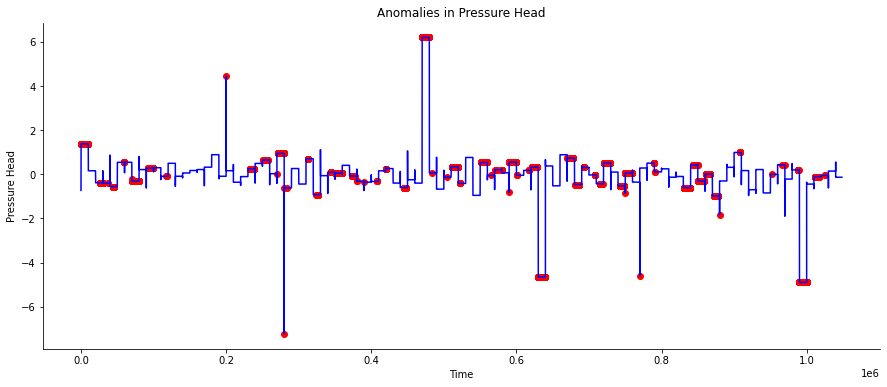

In [53]:
fig, ax = plt.subplots(figsize=(15,6))

a = df_test.loc[df_test['prediction'] == 1, ['H']] #anomaly

ax.plot(df_test.index, df_test['H'], color='blue')
ax.scatter(a.index, a['H'], color='red')
sb.despine()
plt.title("Anomalies in Pressure Head")
plt.xlabel("Time")
plt.ylabel("Pressure Head")
plt.show()

In [51]:
df_test_ANOMALY=df_test.loc[df_test['prediction']==1]

In [52]:
df_test_ANOMALY

,P out bar,P in bar,Q L/M,Dynamic Pressure,H,y_test,prediction
1,1.465952,1.664881,1.177414,0.788860,1.380058,255773,1
2,1.465952,1.664881,1.177414,0.626090,1.380058,255773,1
3,1.465952,1.664881,1.177414,1.072405,1.380058,255773,1
4,1.465952,1.664881,1.177414,0.198206,1.380058,255773,1
5,1.465952,1.664881,1.177414,0.896554,1.380058,255773,1
...,...,...,...,...,...,...,...
1017361,-0.187036,-1.507828,1.521294,-3.314491,-0.105834,255773,1
1017369,-0.187036,-1.507828,1.521294,-3.175284,-0.105834,255773,1
1017374,-0.187036,-1.507828,1.521294,-3.146445,-0.105834,255773,1
1025680,-0.111904,-1.095700,1.109368,3.498190,-0.052825,255773,1


# Vibration

In [54]:
Normal_Vib=pd.read_csv("Normal_Vib.csv")
Normal_Vib=Normal_Vib.drop(columns=['Unnamed: 0'])
Normal_Vib

,Time,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,0.000000,1.161289,-0.084085,49.443383,0.897711,0.374315,1.245374
1,0.000098,1.161289,-0.084085,49.443383,-0.612374,1.983866,1.245374
2,0.000195,1.161289,-0.084085,49.443383,-0.699269,2.101856,1.245374
3,0.000293,1.161289,-0.084085,49.443383,1.121377,1.053456,1.245374
4,0.000391,1.161289,-0.084085,49.443383,-0.672813,-2.743689,1.245374
...,...,...,...,...,...,...,...
919995,89.843262,0.593152,-0.090887,49.371344,-1.833754,-1.940224,0.684039
919996,89.843359,0.593152,-0.090887,49.371344,1.000499,1.311315,0.684039
919997,89.843457,0.593152,-0.090887,49.371344,-0.302599,0.097853,0.684039
919998,89.843555,0.593152,-0.090887,49.371344,-1.227691,3.129577,0.684039


In [55]:
Normal_Vibx=Normal_Vib
Normal_Vib=Normal_Vibx.drop(columns=['Time '])
Normal_Vib

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,1.161289,-0.084085,49.443383,0.897711,0.374315,1.245374
1,1.161289,-0.084085,49.443383,-0.612374,1.983866,1.245374
2,1.161289,-0.084085,49.443383,-0.699269,2.101856,1.245374
3,1.161289,-0.084085,49.443383,1.121377,1.053456,1.245374
4,1.161289,-0.084085,49.443383,-0.672813,-2.743689,1.245374
...,...,...,...,...,...,...
919995,0.593152,-0.090887,49.371344,-1.833754,-1.940224,0.684039
919996,0.593152,-0.090887,49.371344,1.000499,1.311315,0.684039
919997,0.593152,-0.090887,49.371344,-0.302599,0.097853,0.684039
919998,0.593152,-0.090887,49.371344,-1.227691,3.129577,0.684039


In [56]:
#Normalizing the data
for col in Normal_Vib:
    Normal_Vib[col] = (Normal_Vib[col]-Normal_Vib[col].min())/(Normal_Vib[col].max()-Normal_Vib[col].min())

In [57]:
Cavitation_Vib=pd.read_csv("Cavitation_Vib.csv")
Cavitation_Vib=Cavitation_Vib.drop(columns=['Unnamed: 0'])
Cavitation_Vib

,Time,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,0.000000,0.165204,-0.616328,27.839285,0.283178,-0.124765,0.781532
1,0.000098,0.371800,-0.616328,27.839285,-0.120759,-0.894264,0.988128
2,0.000195,0.371800,-0.616328,27.839285,0.331279,0.257127,0.988128
3,0.000293,0.371800,-0.616328,27.839285,0.509145,-0.061347,0.988128
4,0.000391,0.371800,-0.616328,27.839285,0.419741,-1.516285,0.988128
...,...,...,...,...,...,...,...
1048571,102.399512,0.215623,-0.624159,27.789128,-0.415425,-0.193316,0.839782
1048572,102.399609,0.215623,-0.624159,27.789128,-0.075482,0.310897,0.839782
1048573,102.399707,0.215623,-0.624159,27.789128,0.161987,0.578513,0.839782
1048574,102.399805,0.215623,-0.624159,27.789128,-0.611381,0.048815,0.839782


In [58]:
Cavitation_Vibx=Cavitation_Vib
Cavitation_Vib=Cavitation_Vib.drop(columns=['Time '])
Cavitation_Vib

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H
0,0.165204,-0.616328,27.839285,0.283178,-0.124765,0.781532
1,0.371800,-0.616328,27.839285,-0.120759,-0.894264,0.988128
2,0.371800,-0.616328,27.839285,0.331279,0.257127,0.988128
3,0.371800,-0.616328,27.839285,0.509145,-0.061347,0.988128
4,0.371800,-0.616328,27.839285,0.419741,-1.516285,0.988128
...,...,...,...,...,...,...
1048571,0.215623,-0.624159,27.789128,-0.415425,-0.193316,0.839782
1048572,0.215623,-0.624159,27.789128,-0.075482,0.310897,0.839782
1048573,0.215623,-0.624159,27.789128,0.161987,0.578513,0.839782
1048574,0.215623,-0.624159,27.789128,-0.611381,0.048815,0.839782


In [59]:
#Normalizing the data
for col in Cavitation_Vib:
    Cavitation_Vib[col] = (Cavitation_Vib[col]-Cavitation_Vib[col].min())/(Cavitation_Vib[col].max()-Cavitation_Vib[col].min())

In [60]:
scaler.fit(Normal_Vib)
Normal_Vib = scaler.transform(Normal_Vib)

scaler.fit(Cavitation_Vib)
Cavitation_Vib = scaler.transform(Cavitation_Vib)


In [61]:
df=Normal_Vib
Cavdf=Cavitation_Vib


In [62]:
df = pd.DataFrame(df, columns =[ 'P out bar', 'P in bar', 'Q  L/M', 'Vibration 1','Vibration 2','H'])
Cavdf = pd.DataFrame(Cavdf, columns =['P out bar', 'P in bar', 'Q  L/M', 'Vibration 1','Vibration 2','H'])


In [63]:
X_train, X_test=train_test_split(df, test_size=0.3, random_state=1)


In [64]:
oneclass_SVM.fit(X_train)

OneClassSVM(gamma=0.1, nu=0.01)

In [65]:
prediction= oneclass_SVM.predict(X_test)
score =0
for f in range (0,X_test.shape[0]):
    if(prediction[f]==1):
        score=score+1

accuracy = score / X_test.shape[0]
print("Accuracy: {:.2%}".format(accuracy))


Accuracy: 99.01%


In [66]:

prediction= oneclass_SVM.predict(Cavdf)
score =0
for f in range (0,Cavdf.shape[0]):
    if(prediction[f]==1):
        score=score+1

accuracy = score / Cavdf.shape[0]
print("Accuracy: {:.2%}".format(accuracy))


Accuracy: 93.92%


In [67]:
df_test = Cavdf

In [68]:
prediction = [1 if i==-1 else 0 for i in prediction]
df_test['y_test'] = score
df_test['prediction'] = prediction

In [69]:
df_test

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H,y_test,prediction
0,-0.637856,1.664881,1.177414,0.415064,-0.111326,-0.730041,984856,0
1,1.465952,1.664881,1.177414,-0.192664,-0.761338,1.380058,984856,1
2,1.465952,1.664881,1.177414,0.487433,0.211266,1.380058,984856,1
3,1.465952,1.664881,1.177414,0.755034,-0.057756,1.380058,984856,1
4,1.465952,1.664881,1.177414,0.620525,-1.286773,1.380058,984856,1
...,...,...,...,...,...,...,...,...
1048571,-0.124429,0.189847,0.438994,-0.635992,-0.169233,-0.135096,984856,0
1048572,-0.124429,0.189847,0.438994,-0.124544,0.256686,-0.135096,984856,0
1048573,-0.124429,0.189847,0.438994,0.232731,0.482747,-0.135096,984856,0
1048574,-0.124429,0.189847,0.438994,-0.930811,0.035300,-0.135096,984856,0


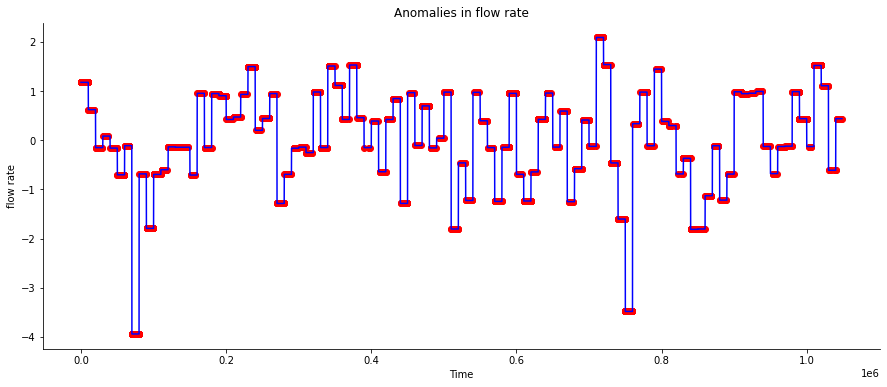

In [70]:
fig, ax = plt.subplots(figsize=(15,6))

a = df_test.loc[df_test['prediction'] == 1, ['Q  L/M']] #anomaly

ax.plot(df_test.index, df_test['Q  L/M'], color='blue')
ax.scatter(a.index, a['Q  L/M'], color='red')
sb.despine()
plt.title("Anomalies in flow rate")
plt.xlabel("Time")
plt.ylabel("flow rate")
plt.show()

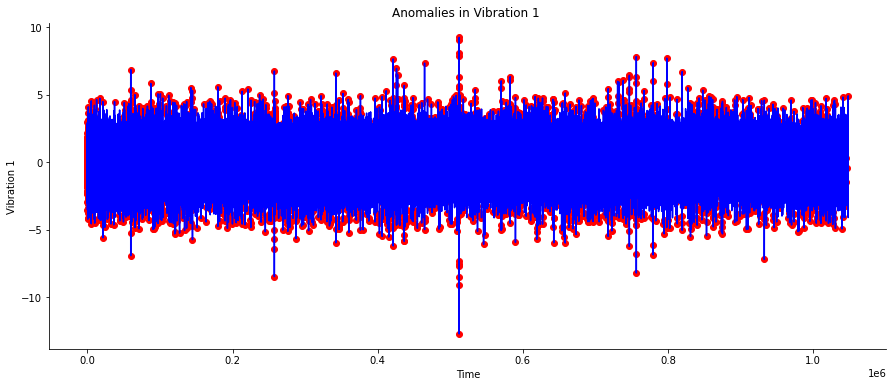

In [71]:
fig, ax = plt.subplots(figsize=(15,6))

a = df_test.loc[df_test['prediction'] == 1, ['Vibration 1']] #anomaly

ax.plot(df_test.index, df_test['Vibration 1'], color='blue')
ax.scatter(a.index, a['Vibration 1'], color='red')
sb.despine()
plt.title("Anomalies in Vibration 1 ")
plt.xlabel("Time")
plt.ylabel("Vibration 1")
plt.show()

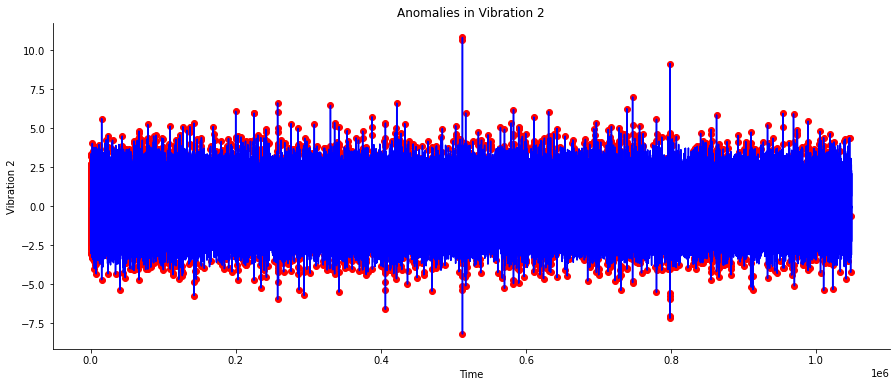

In [72]:
fig, ax = plt.subplots(figsize=(15,6))

a = df_test.loc[df_test['prediction'] == 1, ['Vibration 2']] #anomaly

ax.plot(df_test.index, df_test['Vibration 2'], color='blue')
ax.scatter(a.index, a['Vibration 2'], color='red')
sb.despine()
plt.title("Anomalies in Vibration 2")
plt.xlabel("Time")
plt.ylabel("Vibration 2")
plt.show()

In [73]:
df_test_ANOMALY=df_test.loc[df_test['prediction']==1]

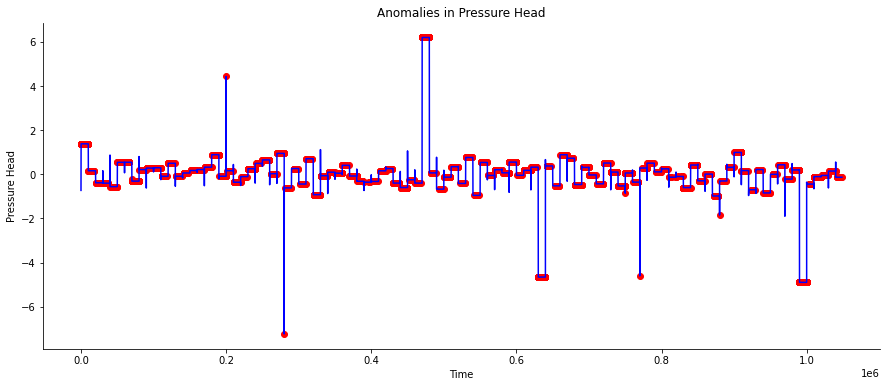

In [76]:
fig, ax = plt.subplots(figsize=(15,6))

a = df_test.loc[df_test['prediction'] == 1, ['H']] #anomaly

ax.plot(df_test.index, df_test['H'], color='blue')
ax.scatter(a.index, a['H'], color='red')
sb.despine()
plt.title("Anomalies in Pressure Head")
plt.xlabel("Time")
plt.ylabel("Pressure Head")
plt.show()

In [74]:
df_test_ANOMALY

,P out bar,P in bar,Q L/M,Vibration 1,Vibration 2,H,y_test,prediction
1,1.465952,1.664881,1.177414,-0.192664,-0.761338,1.380058,984856,1
2,1.465952,1.664881,1.177414,0.487433,0.211266,1.380058,984856,1
3,1.465952,1.664881,1.177414,0.755034,-0.057756,1.380058,984856,1
4,1.465952,1.664881,1.177414,0.620525,-1.286773,1.380058,984856,1
5,1.465952,1.664881,1.177414,1.448109,-0.057910,1.380058,984856,1
...,...,...,...,...,...,...,...,...
1044089,-0.124429,0.189847,0.438994,-3.203775,2.950621,-0.135096,984856,1
1045166,-0.124429,0.189847,0.438994,0.347653,4.365995,-0.135096,984856,1
1045981,-0.124429,0.189847,0.438994,-1.469712,4.400162,-0.135096,984856,1
1047337,-0.124429,0.189847,0.438994,-0.429430,-4.222542,-0.135096,984856,1
